# CS 559 HW1 - Matthew Viafora

## Imports

In [230]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Load and view datset

In [231]:
iris = datasets.load_iris()

In [232]:
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [233]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Replace with our classes (Virginica and Non-Virginica)

In [234]:
iris_df['target'] = iris_df['target'].replace([1],0)
iris_df['target'] = iris_df['target'].replace([2],1)

In [235]:
x = iris_df.drop('target',1)
y = iris_df['target']

## Split into 80% training and 20% testing

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

## Use (stochastic) gradient descent:w(τ+1)=w(τ)−η∇E(w(τ)).

In [237]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [279]:
def train(X, y):
    
    # Random intilization of weights
    w = np.random.rand(X.shape[1],1)
    
    ## Convert to numpy array
    X_m = X.to_numpy()
    y = y.to_numpy()

    # Epochs
    for x in range(1000):

        # For each training data
        for i in range(X.shape[0]):
            a = np.dot(X_m[i,0:],w)
            yi = sigmoid(a)
            
            # for each parameter
            for j in range(w.shape[0]):
    #             print("Before: ", w[j])

                w[j] -= 0.05*((yi-y[i])*X_m[i,j])

    #             print("After: ", w[j])
    #             print("____________________")

            
    return w

In [280]:
w = train(x_train, y_train)

In [281]:
print(w)

[[-6.67616416]
 [-7.43029614]
 [ 9.22975579]
 [12.50930087]]


## Predictions/Accuracy

In [282]:
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [283]:
correct = 0
for i in range(x_test.shape[0]):
    prediction = None
    a = np.dot(w.T, x_test[i, 0:])
    pre_prediction = sigmoid(a)
    if pre_prediction > 0.5:
        prediction = 1
    else:
        prediction = 0
#     print(prediction)
#     print(prediction," vs ", y_test[i])
    if (prediction == y_test[i]):
#         print("CORRECT")
        correct+=1
#     else:
#         print("INCORRECT")
#     print("__________________")
    
print("___________________________________________________")
print("ACCURACY: ", correct/y_test.shape[0])

___________________________________________________
ACCURACY:  0.9333333333333333


## Visualize Decision Boundary

In [290]:
iris_0 = iris_df[iris_df['target']==0]
iris_1 = iris_df[iris_df['target']==1]
iris_0 = iris_0.to_numpy()
iris_1 = iris_1.to_numpy()

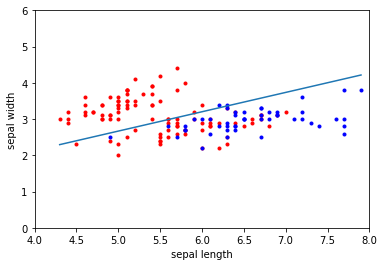

In [328]:
iris_data = iris_df.to_numpy()
lspace = [min(iris_data[:,0]), max(iris_data[:,0])]
m = -w[0]/w[3]
a = m*lspace

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.plot(iris_0[:, 0], iris_0[:, 1], "r.")
plt.plot(iris_1[:, 0], iris_1[:, 1], "b.")
plt.xlim([4, 8])
plt.ylim([0, 6])
plt.plot(lspace, a)
plt.show()